In [2]:
# Find the correct base path
%cd ..

c:\Users\joonn\Desktop\pyscript\fs_processor_main


In [3]:
from tensorflow import keras
from models.ts_cnn import TS_CNN as ts_cnn
import numpy as np
from sklearn.model_selection import train_test_split
from models.loader import loader
import matplotlib.pyplot as plt
from sklearn import preprocessing
from utils.normalisation import min_max

In [3]:
# data
x_incidents = np.loadtxt('data/processed/keith_incidents_acc.txt')

# Labels
y = np.ones(x_incidents.shape[0])


In [4]:
x = x_incidents
a = []
for i in range(x.shape[0]): 
    try:
        a.append(min_max(x[i].tolist()))
    except:
        continue

x_norm = np.asarray(a)

In [5]:
y = y.reshape(len(y), 1)


print(f'x: {x.shape}')
print(f'nans: {np.any(np.isnan(x))}')
print(f'y: {y.shape}')

x: (44, 200)
nans: False
y: (44, 1)


# Load Model

In [6]:
model = ts_cnn()
model.load_weights('model_weights.h5')

In [7]:
idx = np.random.permutation(len(x))
x = x[idx]
y = y[idx]

In [92]:
from sklearn.metrics import confusion_matrix
y_val = np.reshape(y, (len(y),))
y_pred = np.argmax(model.predict(x),axis=1)

2/2 [==============================] - 0s 4ms/step


In [93]:
print('predictions: ', y_pred.shape)
print('labels: ', y_val.shape)

predictions:  (44,)
labels:  (44,)


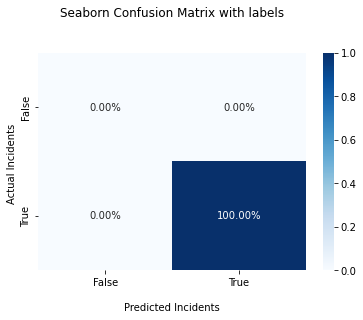

In [94]:
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(z, y_pred, labels=[0,1])
import seaborn as sns

ax = sns.heatmap(result/np.sum(result), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Incidents')
ax.set_ylabel('Actual Incidents ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

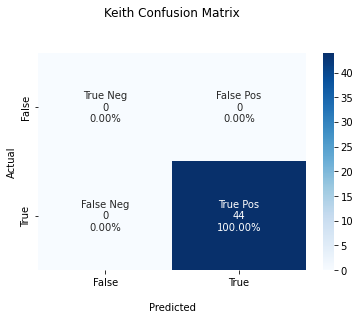

In [95]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                result.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     result.flatten()/np.sum(result)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(result, annot=labels, fmt='', cmap='Blues')

ax.set_title('Keith Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Save if necessary

In [90]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\joonn\AppData\Local\Temp\tmp17fmwfzk\assets


INFO:tensorflow:Assets written to: C:\Users\joonn\AppData\Local\Temp\tmp17fmwfzk\assets
